In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow
tensorflow.compat.v1.logging.set_verbosity(tensorflow.compat.v1.logging.ERROR)

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My\ Drive
%cd cw
%ls

Mounted at /gdrive
/gdrive/My Drive
/gdrive/My Drive/cw
001000/  2036.simput  allwise_aux/  maps.txt      sources.txt
002036/  2.hdf5       Area.py       model.hdf5    Srcgen.py
1.hdf5   3.hdf5       do_png.py     __pycache__/  Unet.py


In [3]:
import tensorflow
from tensorflow.keras import backend as K
sess = tensorflow.Session(config=tensorflow.ConfigProto(log_device_placement=True))
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



['/device:GPU:0']

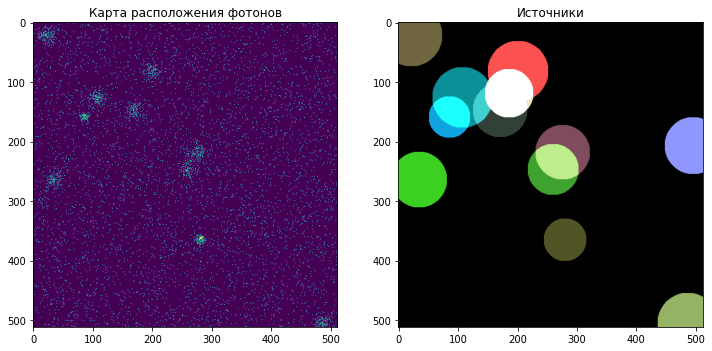

In [4]:
from Unet import *
from Srcgen import *

In [0]:
input_size=(512, 512, 1)
n_src = 12
max_rad = 50
max_n = 120
d_noise = 0.02
scale = 4
steps = 10

In [0]:
model = unet(input_size=input_size, filters=32, blocks=3, output_layers=n_src)

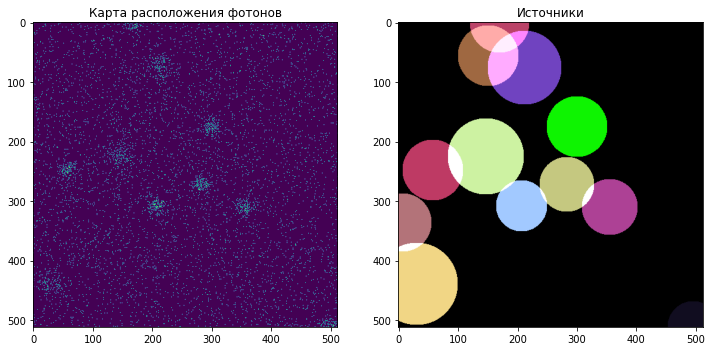

(1, 512, 512, 1) (1, 512, 512, 12)


In [7]:
for X, Y in gen_train(n_src=n_src, max_rad=max_rad, max_n=max_n, shape=input_size, d_noise=d_noise, scale_mult=scale):
    show_x_y(X, Y)
    print(X.shape, Y.shape)
    break

In [0]:
filepath='/gdrive/My Drive/cw/4.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min', save_weights_only=False)
callbacks_list = [checkpoint]

In [14]:
history = model.fit_generator(
    gen_train(n_src=n_src, max_rad=max_rad, max_n=max_n, shape=input_size, d_noise=d_noise, scale_mult=scale, steps=steps),
    steps_per_epoch = 1,
    epochs=5, callbacks=callbacks_list)

Epoch 1/5

Epoch 00001: loss improved from inf to 0.78829, saving model to /gdrive/My Drive/cw/4.hdf5
1/1 [==============================] - 70s 70s/step - loss: 0.7883 - acc: 0.0311 - iou: 0.3122
Epoch 2/5

Epoch 00002: loss did not improve from 0.78829
1/1 [==============================] - 38s 38s/step - loss: 0.8152 - acc: 0.0318 - iou: 0.3239
Epoch 3/5

Epoch 00003: loss did not improve from 0.78829
1/1 [==============================] - 49s 49s/step - loss: 0.8474 - acc: 0.0310 - iou: 0.3360
Epoch 4/5

Epoch 00004: loss did not improve from 0.78829
1/1 [==============================] - 49s 49s/step - loss: 0.8614 - acc: 0.0330 - iou: 0.3427
Epoch 5/5

Epoch 00005: loss did not improve from 0.78829
1/1 [==============================] - 48s 48s/step - loss: 0.8515 - acc: 0.0303 - iou: 0.3381


In [15]:
history = model.fit_generator(
    gen_train(n_src=n_src, max_rad=max_rad, max_n=max_n, shape=input_size, d_noise=d_noise, scale_mult=scale, steps=step),
    steps_per_epoch = 50,
    epochs=50, callbacks=callbacks_list)

Epoch 1/50


ResourceExhaustedError: ignored